<a href="https://colab.research.google.com/github/atanska-atos/SalaryPrediction/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd

In [139]:
dataset = pd.read_csv("/content/Salary Data.csv")

In [140]:
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [141]:
dataset.loc[dataset["Age"]<18]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [142]:
dataset.loc[dataset["Age"]>60]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [143]:
dataset.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [144]:
dataset[dataset.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
dataset.shape

(375, 6)

In [146]:
dataset = dataset.dropna(axis=0,how="any")

In [147]:
dataset.shape

(373, 6)

In [148]:
dataset.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [149]:
mean_age = dataset["Age"].mean()
mean_age

37.43163538873995

In [150]:
mean_years_of_experience = dataset["Years of Experience"].mean()
mean_years_of_experience

10.03083109919571

In [151]:
mean_salary = dataset["Salary"].mean()
print("{:.2f}".format(mean_salary))

100577.35


In [152]:
dataset[dataset["Years of Experience"] > mean_years_of_experience].count()

Age                    157
Gender                 157
Education Level        157
Job Title              157
Years of Experience    157
Salary                 157
dtype: int64

In [153]:
dataset[dataset["Salary"]>mean_salary].count()

Age                    162
Gender                 162
Education Level        162
Job Title              162
Years of Experience    162
Salary                 162
dtype: int64

In [154]:
min_salary = 55000
threshold_salary = pd.Series(dataset["Salary"]>min_salary)
dataset = pd.concat([dataset,threshold_salary.rename("Threshold Salary")],axis=1)

dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Threshold Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,True
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,True
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,True
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,True
4,52.0,Male,Master's,Director,20.0,200000.0,True
...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,True
371,43.0,Male,Master's,Director of Operations,19.0,170000.0,True
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,False
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0,True


In [155]:
dataset[dataset["Threshold Salary"]==False].count()

Age                    96
Gender                 96
Education Level        96
Job Title              96
Years of Experience    96
Salary                 96
Threshold Salary       96
dtype: int64

In [156]:
print(dataset.groupby(dataset["Threshold Salary"])["Age","Years of Experience"].mean())

                        Age  Years of Experience
Threshold Salary                                
False             29.187500             2.609375
True              40.288809            12.602888


<ipython-input-156-bad0cdd32567>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(dataset.groupby(dataset["Threshold Salary"])["Age","Years of Experience"].mean())


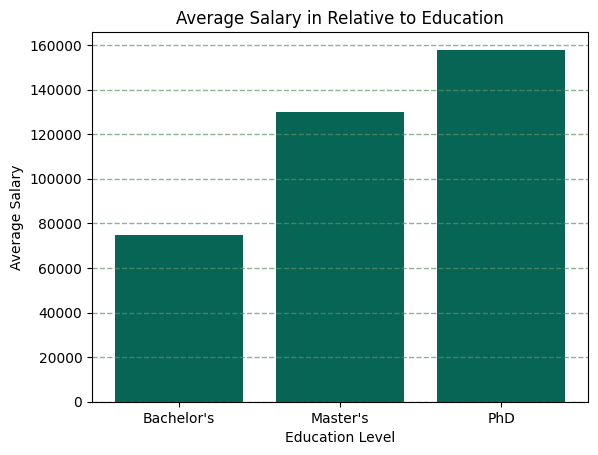

In [157]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.bar(x=dataset["Education Level"].drop_duplicates(), height=dataset.groupby(dataset["Education Level"])["Salary"].mean(),color="#066555")
plt.title("Average Salary in Relative to Education")
plt.xlabel("Education Level")
plt.ylabel("Average Salary")
plt.grid(color='#609066',linestyle='--', linewidth = 1, axis='y', alpha=0.7)

plt.show()

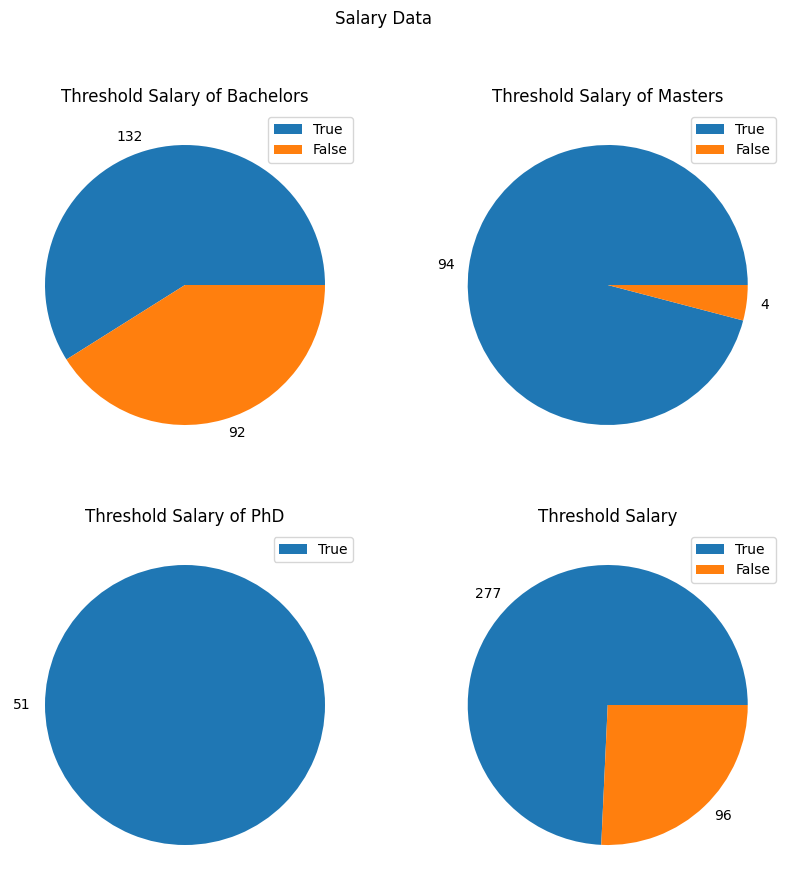

In [182]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

bachelors = dataset.loc[dataset["Education Level"]=="Bachelor's"]
threshold_bachelors = bachelors["Threshold Salary"].value_counts()
ax[0,0].pie(threshold_bachelors, labels = threshold_bachelors)
ax[0,0].set_title("Threshold Salary of Bachelors")
ax[0,0].legend(threshold_bachelors.keys().tolist())

masters = dataset.loc[dataset["Education Level"]=="Master's"]
threshold_masters = masters["Threshold Salary"].value_counts()
ax[0,1].pie(threshold_masters, labels=threshold_masters)
ax[0,1].set_title("Threshold Salary of Masters")
ax[0,1].legend(threshold_masters.keys().tolist())

phd = dataset.loc[dataset["Education Level"]=="PhD"]
threshold_phd = phd['Threshold Salary'].value_counts()
ax[1,0].pie(threshold_phd, labels=threshold_phd)
ax[1,0].set_title("Threshold Salary of PhD")
ax[1,0].legend(threshold_phd.keys().tolist())


threshold_counts = dataset["Threshold Salary"].value_counts()
ax[1,1].pie(threshold_counts, labels = threshold_counts)
ax[1,1].set_title("Threshold Salary")
ax[1,1].legend(threshold_counts.keys().tolist())

fig.suptitle("Salary Data")
fig.show()